# Clustering of customers by credit card data

In this track you're asked to cluster similar customers according to their credit card history. 

## Marking criteria: 

- **2 points** : Prepare the data set and implement a basic K-means++ algorithm;
- **2 point**  : Apply elbow method & PCA to get more reliable results;
- **1 points** : Write a function  to evaluate the quality of clustering & visualize the clusters.


## 1. Basic clusterization [2 points]

### 1.1 Prepare the data [1 points]

Load `CC GENERAL.csv` into a pandas data frame and print the head (5 rows) and statistics (mean, max, min, etc. for every feature) of the frame to get a clue what the data looks like. You need to **remove one of the column** which is redundant for customer clusterization.

***Do not use any additional libraries***

In [187]:
import pandas as pd

In [188]:
# loading the dataset
df = pd.read_csv('CC GENERAL.csv')

In [189]:
# print the first 5 rows of the dataframe
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [190]:
# print statistics for features
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [191]:
# print the dimensionality of dataframe
df.shape

(8950, 18)

In [192]:
# find the amount of unique values in each column of the data set
unique_values = pd.DataFrame({'Feature': df.columns, 
                              'Unique values': df.nunique()})

# sort the amount of unique values in each column in descending order
sorted_unique_values = (unique_values
                       .sort_values(by='Unique values', ascending=False)
)

# print the first 3 rows of unqie values sorted in descending order
sorted_unique_values.head(3)

,Feature,Unique values
CUST_ID,CUST_ID,8950
BALANCE,BALANCE,8871
PAYMENTS,PAYMENTS,8711


In [193]:
# find the proportion of unique custoner ids in the dataframe
proportion_of_unique_ids = df['CUST_ID'].nunique() / df.shape[0]
proportion_of_unique_ids

1.0

Based on the obtained proportion of unique values in the `CUST_ID` column, all values of ids are unique. Therefore, it can be concluded that this feature does not provide certain information about customers, so it is redundant for customer clusterization and should be removed from the dataframe.

In [194]:
# remove the redundant feature
df = df.drop(['CUST_ID'], axis=1)

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

You may notice that the data set is not perfectly clear. **Remove all the entries that have NaN** features or approximate these features by the similar rows. Also, make sure there are no duplicates.

Some of the columns are already normalized, while others not. To make the clusterization stable, it's recommended every feature to be **normalized**.

In [196]:
from sklearn.preprocessing import MinMaxScaler

In [197]:
# print the sum of missing values in each column
df.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

As can be seen, the column `CREDIT_LIMIT` has one missing value as well as the column `MINIMUM_PAYMENTS` has 313 missing values. Let's remove or impute them.

Firstly, I decided to remove an entry with missing value in the column `CREDIT_LIMIT`:

In [198]:
# remove a row with missing value in column 'CREDIT_LIMIT'
df.dropna(subset=['CREDIT_LIMIT'], inplace=True)

Then, I observed that all entries with the 0 values in the `PAYMENTS` have missing values in the `MINIMUM_PAYMENTS` column. So, I assumed that if the payment is 0, the minimum payment is also 0, and decided to impute the missing values with zeros:

In [199]:
df[df['PAYMENTS'] == 0]['MINIMUM_PAYMENTS'].unique()

array([nan])

In [200]:
# impute the missing values with zeros
df.loc[df['PAYMENTS'] == 0, 'MINIMUM_PAYMENTS'] = df.loc[df['PAYMENTS'] == 0, 'MINIMUM_PAYMENTS'].fillna(0)

I decided to remove the remaining entries with missing values in `MINIMUM_PAYMENTS` column as it is no more appropriate relations:


In [201]:
# remove entries with the remaining missing values
df.dropna(subset=['MINIMUM_PAYMENTS'], inplace=True)

In [202]:
# double check the missing values
if df.isna().sum().sum() == 0:
    print('All correct. There is no missing values in the data set.')
else:
    print('Something wrong.')

All correct. There is no missing values in the data set.


Let's check the duplicates in the dataframe:

In [203]:
# check the duplicates 
if df.duplicated().sum() == 0:
    print('There is no duplicates in the data set.')
else:
    print('The data set has duplicates.')

There is no duplicates in the data set.


Let's normalize the features using MinMaxScaler:



In [204]:
# features normalization (I normalized all features since the normalization of already normalized features will not affect values)
scaler = MinMaxScaler()
normalized_df = scaler.fit_transform(df)
df = pd.DataFrame(normalized_df, columns=df.columns)

In [205]:
# double check the results of normalization
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8876.000000,8876.000000,8876.000000,8876.000000,8876.000000,8876.000000,8876.000000,8876.000000,8876.000000,8876.000000,8876.000000,8876.000000,8876.000000,8876.000000,8876.000000,8876.000000,8876.000000
mean,0.082837,0.883452,0.020573,0.014627,0.018355,0.020933,0.490281,0.203786,0.363744,0.090764,0.026624,0.041288,0.148777,0.034231,0.011006,0.154996,0.919859
std,0.109504,0.226830,0.043725,0.040868,0.040341,0.044637,0.401426,0.299009,0.397288,0.133746,0.055667,0.069677,0.121734,0.056874,0.030684,0.293378,0.222630
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.007083,0.900000,0.000772,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.002793,0.051753,0.007606,0.002151,0.000000,1.000000
50%,0.046729,1.000000,0.007443,0.000981,0.003936,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,0.019553,0.098497,0.017031,0.003856,0.000000,1.000000
75%,0.108805,1.000000,0.022833,0.014375,0.020890,0.023898,0.916667,0.333333,0.750000,0.166667,0.032520,0.047486,0.215359,0.037625,0.010410,0.142857,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 1.2 Clusterization of the customers [1 point]

Do **K-means++ clusterization** with an arbitrary K.

***You're allowed to use any libraries***

In [206]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [207]:
# perform K-means++ clustering with 5 clusters
K = 5
model = KMeans(n_clusters=K, init='k-means++', n_init=1, random_state=22)
model.fit(df)
labels = model.predict(df)

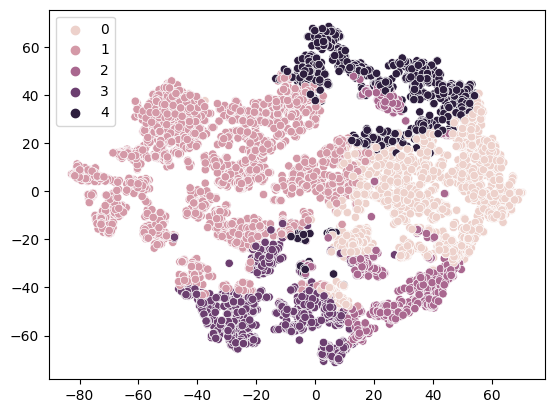

In [208]:
# apply t-SNE to visualize the data points in 2 dimensions
tsne_results = TSNE(n_components=2, perplexity=50).fit_transform(df)
sns.scatterplot(x=tsne_results[:,0], y=tsne_results[:,1], hue=labels, legend='full')

plt.show()

## 2. Improve the result [2 points]

### 2.1 Elbow method [1 points]

Now let's find the optimal value of K. Implement the **elbow method**, choose the best K and **explain your choice** in the comments. 

***Do not use any additional libraries***

In [209]:
from scipy.spatial.distance import cdist
import numpy as np

In [210]:
# the function vizualizes the sum of squared error (sse) values for different K's
# X     : clean data set from the previous step
# max_K : range of the K's for checking
def elbow(X: pd.DataFrame, max_K=10) -> None:
    # calculate the sse score for each value of k
    sse_scores = []
    for k in range(1, max_K + 1):
        model = KMeans(n_clusters=k, init='k-means++', n_init=1, random_state=22)
        model.fit(X)
        distances = cdist(X, model.cluster_centers_, 'euclidean')
        labels = np.argmin(distances, axis=1)
        squared_distances = [distances[i, labels[i]]**2 for i in range(len(X))]
        sse_scores.append(sum(squared_distances)) # sum of squared distances of samples to their closest cluster center

    # plot the sse scores against each value of k and look for an elbow shape
    plt.plot(np.arange(1, max_K + 1), sse_scores, color='indigo')
    plt.grid(True, axis='x')
    plt.xlabel('k')
    plt.ylabel('SSE')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

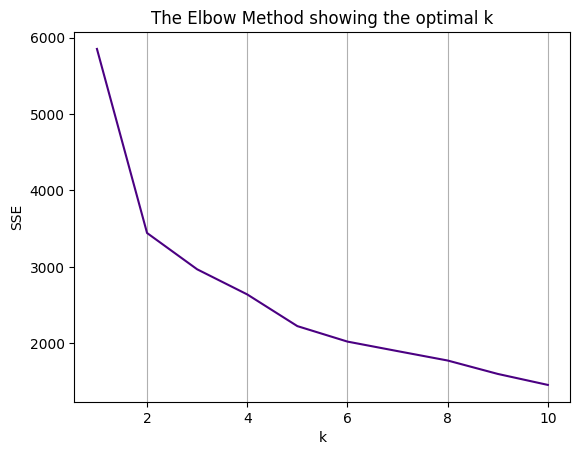

In [211]:
elbow(df)

As can be seen from the graph above, when the number of clusters (k) is equal to 2, there is an elbow shape. This indicates that the optimal value for k is 2.

In [212]:
# the optimum number of clusters according to the elbow method
K_optim = 2

### 2.2 PCA [1 point]

It might be useful to reduce the dimension of this data. **Apply PCA** with an arbitrary number of components on it and try to call elbow() function of the reduced data. Have you changed your choice of K_optim?

***You're allowed to use any libraries***

In [213]:
from sklearn.decomposition import PCA

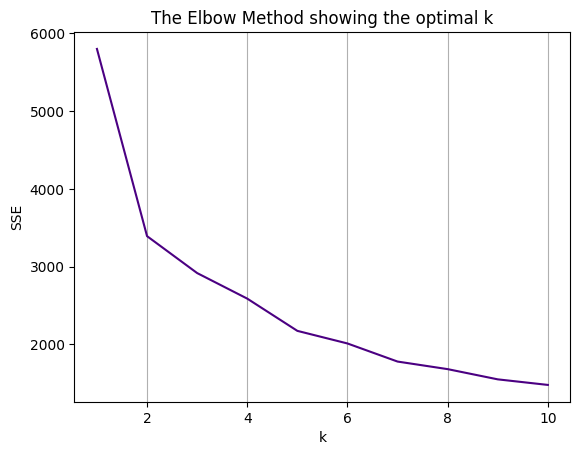

In [214]:
# perform pca with 10 number of components
pca = PCA(n_components=10)
df_reduced = pca.fit_transform(df)
elbow(df_reduced)

The graph above looks pretty similar that one before PCA, so I decided to leave the optimal value for number of clusters as 2.

## 3. Evaluate the quality of clusterization [1 point]

Now you have an optimum K, let's evaluate the quality of the clusterization by ***silhouette score***. Try different values of PCA, try the evaluation without PCA, and conclude what is the best number of principal components according to the silhouette score. Explain your choice in the comments. 

Set the number of principal components to 2 and visualize the clusters. 

***You're allowed to use any libraries***

In [215]:
from sklearn.metrics import silhouette_score

In [216]:
# use_pca :  True, if PCA is used, False otherwise
# n_comp  :  number of principal components for PCA, if it's used
# X       :  clear input data
# silh_sc : silhouette score
def score(use_pca: bool, n_comp: int, X: pd.DataFrame) -> float:
    if use_pca:
        # apply PCA with n_comp principal components
        pca = PCA(n_components=n_comp)
        X_reduced = pca.fit_transform(X)

        # fit KMeans++ model with reduced data and calculate Silhouette score
        model = KMeans(n_clusters=K_optim, init='k-means++', n_init=1, random_state=22)
        preds = model.fit_predict(X_reduced)
        silh_sc = silhouette_score(X_reduced, preds)

    else:
        # fit KMeans++ model with the original data and calculate Silhouette score
        kmeans_model = KMeans(n_clusters=K_optim, init='k-means++', n_init=1, random_state=22)
        preds = kmeans_model.fit_predict(X)
        silh_sc = silhouette_score(X, preds)
    
    return silh_sc

In [217]:
# determine the best number of principal components according to the silhouette score
print(f'No pca : {score(use_pca=False, n_comp=0, X=df)}')
n_comps = np.arange(2, 10)
for n_comp in n_comps:
    silh_score = score(use_pca=True, n_comp=n_comp, X=df)
    print(n_comp, ':', silh_score)

No pca : 0.3888661111819938
2 : 0.5793990627866988
3 : 0.5028970490061572
4 : 0.46210466000412403
5 : 0.4305105043430549
6 : 0.41057186415762625
7 : 0.40087816833692597
8 : 0.3967066385993434
9 : 0.3938332261830856


As can be seen, the silhouette score achieve the highest value when pca with 2 principal components is used. So, it can be concluded that the 2 is the best number of principal components for this case.

In [218]:
# the best number of principal components according to the silhouette score
best_n_comp = 2

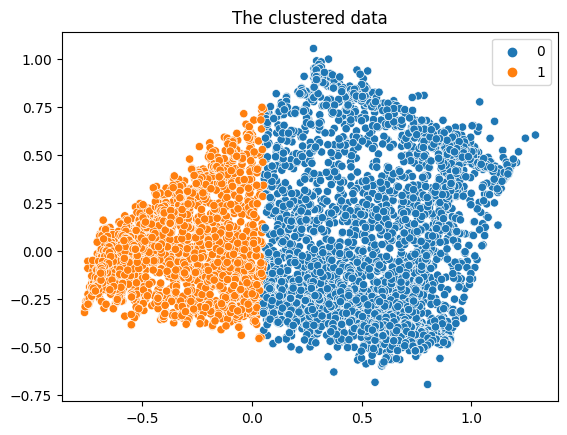

In [219]:
import matplotlib.pyplot as plt

# visualize the clustered data setting the number of components of pca to best_n_comp=2
pca_model = PCA(n_components=best_n_comp)
X_reduced = pca_model.fit_transform(df)

kmeans_model = KMeans(n_clusters=K_optim, init='k-means++', n_init=1, random_state=22)
labels = kmeans_model.fit_predict(X_reduced)

sns.scatterplot(x=X_reduced[:, 0],y=X_reduced[:, 1], hue=labels, legend='full')
plt.title('The clustered data')

plt.show()

### References

https://en.wikipedia.org/wiki/Silhouette_(clustering)